In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

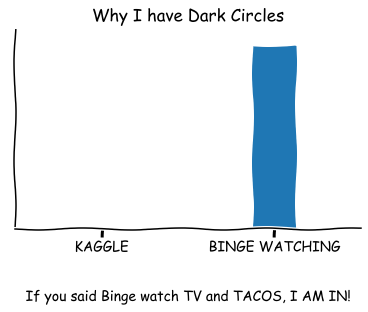

In [2]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Munroe
    # https://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['KAGGLE', 'BINGE WATCHING'])
    ax.set_xlim([-0.5, 1.5])
    ax.set_yticks([])
    ax.set_ylim([0, 110])

    ax.set_title("Why I have Dark Circles")

    fig.text(
        0.5, -0.05,
        'If you said Binge watch TV and TACOS, I AM IN!',
        ha='center')

plt.show()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

In [5]:
#Importing the dataset
prime = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/datasets_724030_1277618_Prime%20TV%20Shows%20Data%20set.csv",encoding="iso-8859-1")

In [6]:
prime.head()

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,2,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016,2,English,Comedy,8.7,18+


In [7]:
prime.shape

(503, 8)

In [8]:
prime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no.                    503 non-null    int64  
 1   Name of the show         503 non-null    object 
 2   Year of release          503 non-null    int64  
 3   No of seasons available  503 non-null    int64  
 4   Language                 503 non-null    object 
 5   Genre                    503 non-null    object 
 6   IMDb rating              220 non-null    float64
 7   Age of viewers           503 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.6+ KB


In [9]:
prime.describe()

,S.no.,Year of release,No of seasons available,IMDb rating
count,503.000000,503.000000,503.000000,220.000000
mean,252.000000,2011.914513,2.514911,7.252727
std,145.347859,11.945704,2.400049,1.014840
min,1.000000,1926.000000,1.000000,3.700000
25%,126.500000,2011.000000,1.000000,6.700000
50%,252.000000,2016.000000,2.000000,7.400000
75%,377.500000,2018.000000,3.000000,8.000000
max,503.000000,2020.000000,20.000000,9.000000


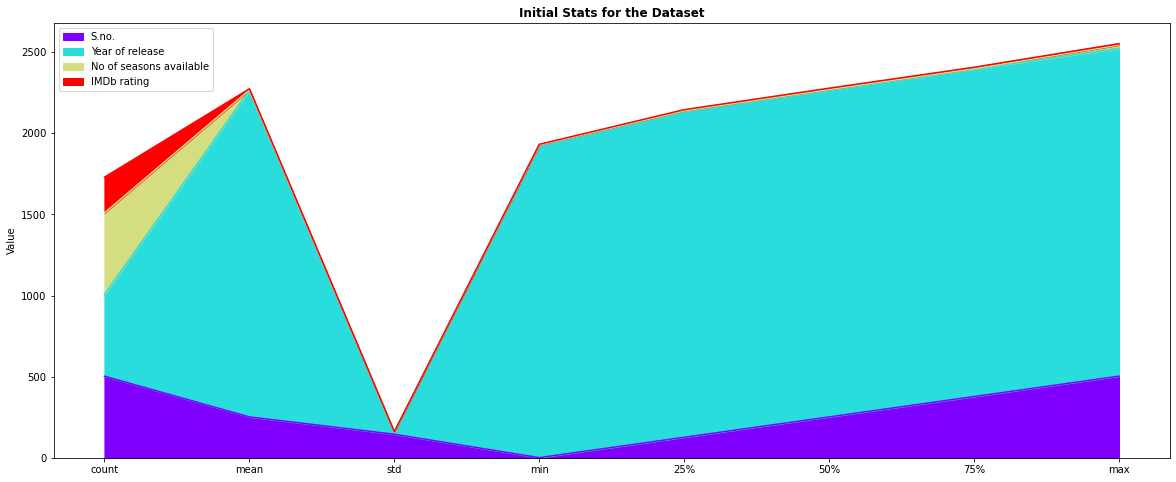

In [10]:
#Just trying to plot the above seen initial stats
prime.describe().plot(kind='area',fontsize=10,figsize=(20,8),colormap='rainbow')
plt.title("Initial Stats for the Dataset",fontweight='bold')
plt.ylabel("Value")
plt.show()

In [11]:
prime.drop(['S.no.'],axis=1,inplace=True)

In [12]:
prime.head()

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,Pataal Lok,2020,1,Hindi,Drama,7.5,18+
1,Upload,2020,1,English,Sci-fi comedy,8.1,16+
2,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
3,Four More Shots Please,2019,2,Hindi,"Drama, Comedy",5.3,18+
4,Fleabag,2016,2,English,Comedy,8.7,18+


In [13]:
#Finding out the show with the maximum no of words
prime['Name of the show'].loc[prime['Name of the show'].map(lambda x: len(x.split())) == 
                              prime['Name of the show'].map(lambda x: len(x.split())).max()]

317    Alice Wettlund: My Mama is a Human and So Am I
Name: Name of the show, dtype: object

In [14]:
#Finding the show whose title is having maximum characters
prime['Name of the show'].loc[prime['Name of the show'].map(lambda x: len(x)) ==
                              prime['Name of the show'].map(lambda x: len(x)).max()]

210    Casanova: PBS Masterpiece Theatre- The Complete Series
Name: Name of the show, dtype: object

In [15]:
prime.loc[prime['Year of release']==prime['Year of release'].min()]

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
201,The Cecil B. DeMille Classics Collection,1926,1,English,Drama,NaN,13+


In [16]:
prime_latest = prime.loc[prime['Year of release']==prime['Year of release'].max()]
prime_latest.style.background_gradient(cmap='Greens')

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,Pataal Lok,2020,1,Hindi,Drama,7.500000,18+
1,Upload,2020,1,English,Sci-fi comedy,8.100000,16+
14,Hunters,2020,1,English,"Drama, Action, Suspense",7.200000,18+
17,The Forgotten Army- Azaadi ke Liye,2020,1,Hindi,"Drama, Action",8.000000,18+
19,Tales from the Loop,2020,1,English,Sci-fi,7.500000,18+
20,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.000000,16+
32,Afsos,2020,1,Hindi,"Drama, Comedy",nan,16+
73,Star Trek: Picard,2020,1,English,Sci-fi,7.600000,18+
104,Dispatches from Elsewhere,2020,1,English,"Drama, Suspense",nan,16+
141,El Presidente,2020,1,Spanish,Drama,nan,All


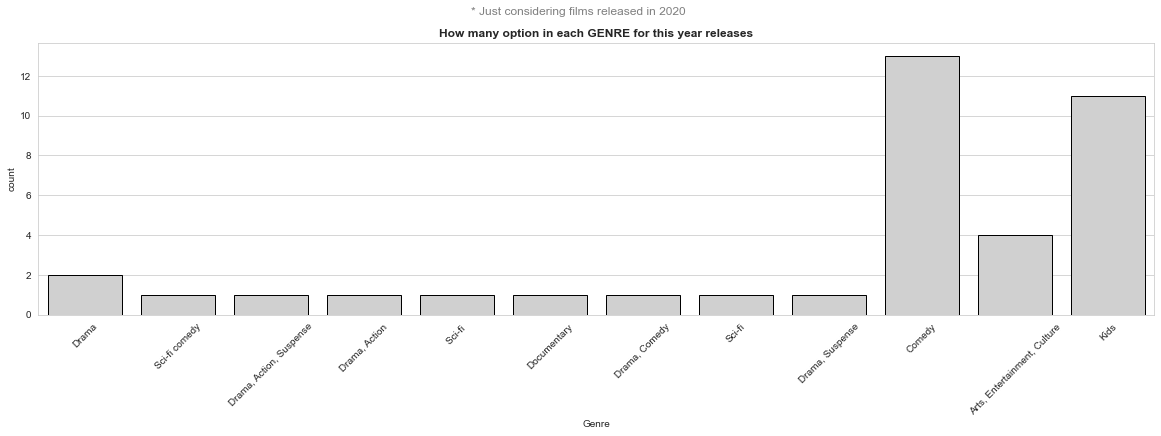

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
sns.countplot(x='Genre',data=prime_latest,color="#d0d0d0",edgecolor='black')
plt.xticks(rotation=45)
plt.title("How many option in each GENRE for this year releases",fontweight='bold')
plt.suptitle("* Just considering films released in 2020",color='grey')
plt.show()

In [18]:
prime_seasons = prime.sort_values(['No of seasons available'],axis=0,ascending=False)[:5]
prime_seasons.style.background_gradient(cmap='Blues')

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
229,Forensic Files,1998,20,English,Documentary,nan,13+
79,NCIS,2004,17,English,"Drama, Action",7.800000,16+
39,Supernatural,2006,15,English,"Drama, Suspense, Horror",8.400000,16+
30,Grey's Anatomy,2005,15,English,Drama,7.600000,16+
29,Doctor Who,2005,13,English,Sci-fi,nan,All


In [19]:
#Just a count check rather than plotting
from collections import Counter
Counter(prime['Language']).keys()

dict_keys(['Hindi', 'English', 'Telugu', 'Italiano', 'Hebrew', 'Japanese', 'Spanish', 'Nederlands', 'Deutsch', 'French', 'Serbian', 'Russian', 'Suomi', 'Marathi'])

In [20]:
Counter(prime['Language'])

Counter({'Hindi': 39,
         'English': 422,
         'Telugu': 1,
         'Italiano': 8,
         'Hebrew': 1,
         'Japanese': 13,
         'Spanish': 6,
         'Nederlands': 2,
         'Deutsch': 3,
         'French': 2,
         'Serbian': 2,
         'Russian': 1,
         'Suomi': 1,
         'Marathi': 2})

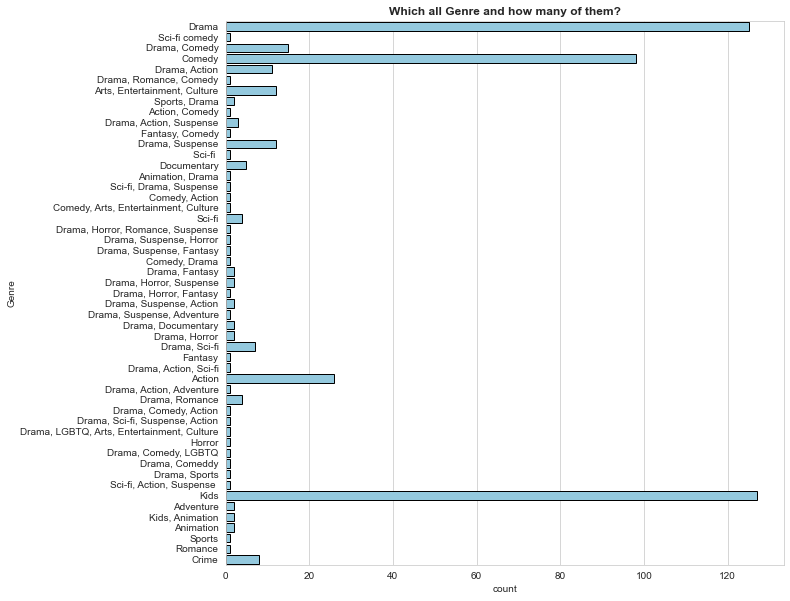

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.title("Which all Genre and how many of them?",fontweight='bold')
sns.countplot(y='Genre',data=prime,color='skyblue',edgecolor='black')
plt.show()

In [22]:
prime.sort_values(['IMDb rating'],axis=0,ascending=False)[:5]

,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
20,The Test: A New Era for Australia's Team,2020,1,English,Documentary,9.0,16+
281,Seinfeld,1990,9,English,Comedy,8.8,13+
340,The Grand Tour,2017,4,English,Sports,8.7,16+
2,The Marvelous Mrs. Maisel,2017,3,English,"Drama, Comedy",8.7,16+
4,Fleabag,2016,2,English,Comedy,8.7,18+


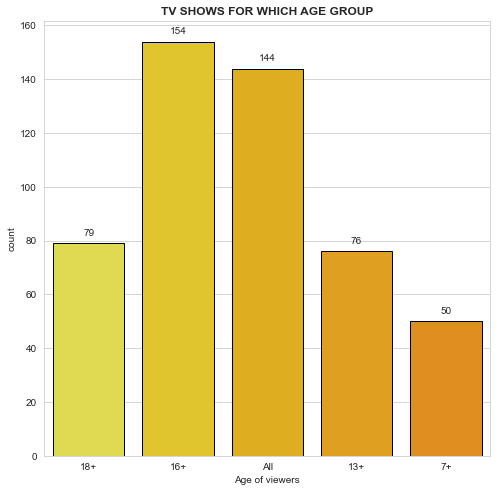

In [24]:
plt.figure(figsize=(8,8))
plt.title("TV SHOWS FOR WHICH AGE GROUP",fontweight='bold')
ax = sns.countplot(x='Age of viewers',data=prime,palette='Wistia',edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

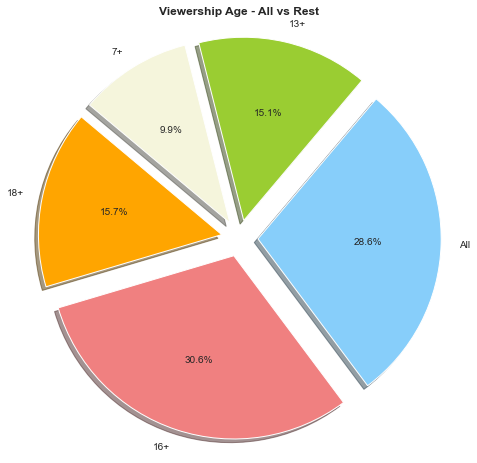

In [25]:
sizes = Counter(prime['Age of viewers']).values()
labels = Counter(prime['Age of viewers']).keys()

explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
  
# Creating color parameters 
colors = ( "orange", "lightcoral", 
          "lightskyblue", "yellowgreen", "beige") 
# Plot
plt.figure(figsize=(8,8))
plt.title("Viewership Age - All vs Rest",fontweight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,shadow=True,autopct='%1.1f%%',startangle=140)
plt.axis('equal')
plt.show()

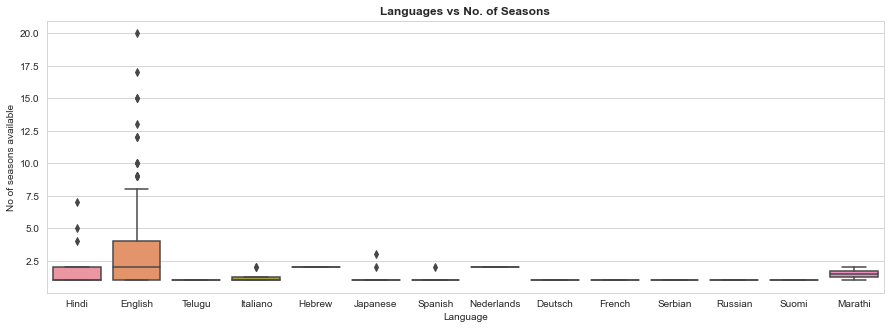

In [26]:
plt.figure(figsize=(15,5))
plt.title("Languages vs No. of Seasons",fontweight='bold')
sns.boxplot(y=prime['No of seasons available'],x=prime['Language'])
plt.show()

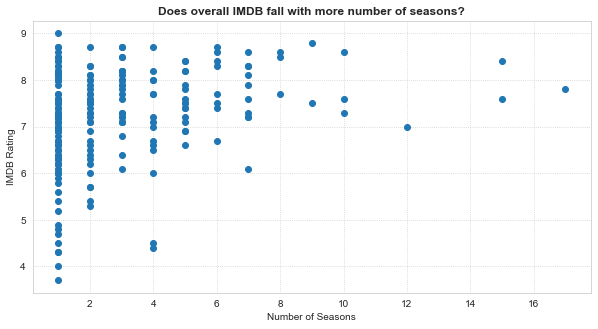

In [27]:

plt.figure(figsize=(10,5))
plt.title("Does overall IMDB fall with more number of seasons?",fontweight='bold')
plt.xlabel("Number of Seasons")
plt.ylabel("IMDB Rating")
plt.scatter(prime['No of seasons available'],prime['IMDb rating'])
plt.grid(linestyle='dotted')
plt.show()

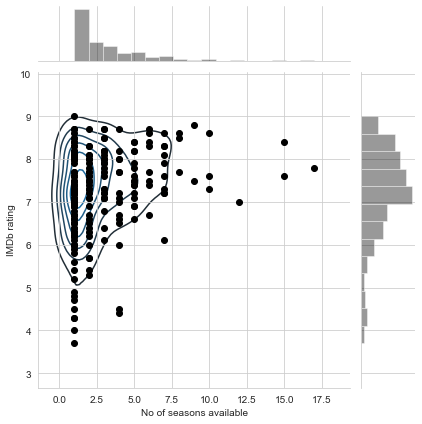

In [28]:
#Trying jointplot fo these two features to understand the underlying relationship more clearly
g = (sns.jointplot("No of seasons available", "IMDb rating",data=prime, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

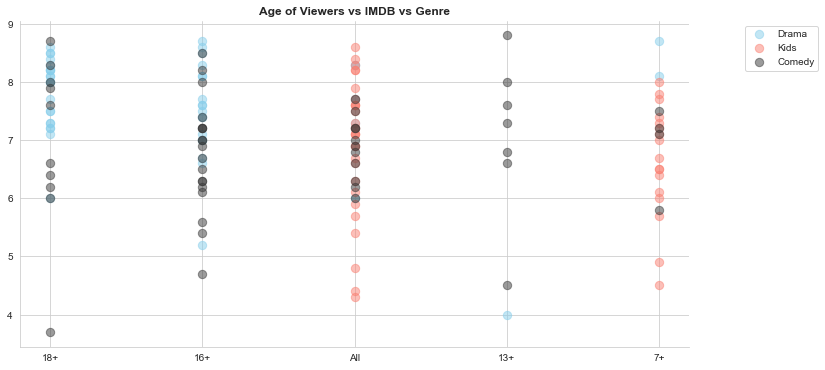

In [29]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.scatter(x='Age of viewers',y='IMDb rating',data=prime[prime['Genre']=='Drama'],color='skyblue',alpha=0.5,
          label='Drama',s=70)
ax.scatter(x='Age of viewers',y='IMDb rating',data=prime[prime['Genre']=='Kids'],color='salmon',alpha=0.5,
          label='Kids',s=70)
ax.scatter(x='Age of viewers',y='IMDb rating',data=prime[prime['Genre']=='Comedy'],color='#383838',alpha=0.5,
          label='Comedy',s=70)
ax.set_title("Age of Viewers vs IMDB vs Genre",fontweight='bold')

ax.legend(bbox_to_anchor=(1.2, 1))

# upper & right border remove 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()